In [1]:
#reference:
#https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis/notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

voice.csv



In [2]:
df = pd.read_csv('../input/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#Checking the correlation between each feature
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [4]:
#Checking whether there is any null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
#Checking shape of the dataset
df.shape

(3168, 21)

**There are 21 features and 3168 instances**

In [6]:
#print the target variable
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [7]:
#Separating features and labels
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [8]:
#Converting string value to int type for labels
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
#Data Standardisation
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
#Splitting dataset into training set and testing set for better generalisation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
#Running SVM with default hyperparameter
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score with default SVM:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score with default SVM:
0.976340694006


In [12]:
#Running SVM with default Linear kernel
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score with default Linear kerel SVM:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score with default Linear kerel SVM:
0.977917981073


In [13]:
#Running SVM with RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score with RBF kernel SVM:')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score with RBF kernel SVM:
0.976340694006


In [14]:
#Running SVM with Polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score with Polynomial kernel SVM:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score with Polynomial kernel SVM:
0.958990536278


In [15]:
#Performing K-fold cross validation with different kernels
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print('CV on Linear kernel::',scores)

CV on Linear kernel:: [ 0.91194969  0.97169811  0.97169811  0.97169811  0.96202532  0.98734177
  0.99050633  0.98101266  0.95253165  0.99367089]


**We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split.**

In [16]:
print(scores.mean())

0.969413263275


In [17]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print('CV on rbf kernel::',scores)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV on rbf kernel:: [ 0.93396226  0.95597484  0.96855346  0.9591195   0.96835443  0.99683544
  0.98734177  0.98101266  0.91455696  0.99367089]


In [18]:
print(scores.mean())

0.965938221479


In [19]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print('CV on Polynomial kernel::',scores)

CV on Polynomial kernel:: [ 0.89937107  0.94654088  0.93081761  0.91509434  0.95886076  1.
  0.98101266  0.96835443  0.87974684  0.9778481 ]


In [20]:
print(scores.mean())

0.945764668418


**When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.

With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.**

**The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well**

In [21]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print('accuracy score::',acc_score)


accuracy score:: [0.96941326327521682, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96941326327521682, 0.96909879786641184, 0.96878433245760687, 0.96846986704880178, 0.96846986704880178, 0.96846986704880178, 0.96846986704880178, 0.96815341135259914, 0.96815341135259914, 0.96815341135259914, 0.96815341135259914, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.96815341135259914, 0.96846787676140433, 0.96846787676140433, 0.9681514210652018, 0.9681514210652018]


Text(0,0.5,'Cross-Validated Accuracy')

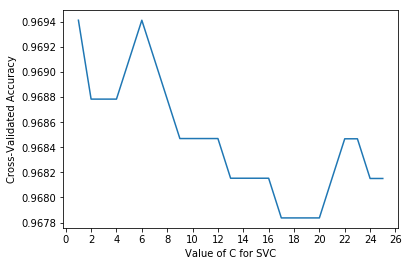

In [22]:
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
%matplotlib inline
C_values=list(range(1,26))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

**From the above plot we can see that accuracy has been close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant.**

**Let us look into more detail of what is the exact value of C which is giving us a good accuracy score**

In [23]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print('accuracy score::',acc_score)

accuracy score:: [0.97004816495501944, 0.96910078815380951, 0.96909879786641184, 0.96909879786641184, 0.96941326327521682, 0.96941326327521682, 0.96972772868402191, 0.96941127298781937, 0.9690968075790144, 0.96941326327521682, 0.96941326327521682, 0.96941326327521682, 0.96941326327521682, 0.96878234217020953, 0.96909879786641184, 0.96909879786641184, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.969098797866411

Text(0,0.5,'Cross-Validated Accuracy')

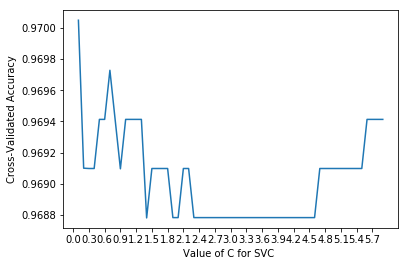

In [24]:
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
%matplotlib inline
C_values=list(np.arange(0.1,6,0.1))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Accuracy score is highest for C=0.1**

**Taking kernel as rbf and taking different values gamma**

**The gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other**

In [25]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print('accuracy score using rbf kernel and gamma::',acc_score)

accuracy score using rbf kernel and gamma:: [0.88781147997770871, 0.95524639757981067, 0.9681514210652018, 0.96309609107555116, 0.9072366849773108, 0.59553777565480459, 0.5]


Text(0,0.5,'Cross-Validated Accuracy')

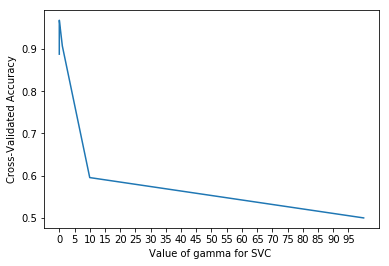

In [26]:
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
%matplotlib inline
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

**We can see that for gamma=10 and 100 the kernel is performing poorly.We can also see a slight dip in accuracy score when gamma is 1.Let us look into more details for the range 0.0001 to 0.1.**

In [27]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.88781147997770871, 0.95524639757981067, 0.9681514210652018, 0.96309609107555116]


Text(0,0.5,'Cross-Validated Accuracy')

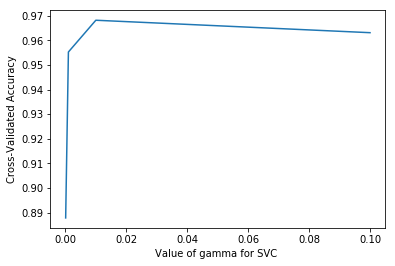

In [28]:
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
%matplotlib inline
gamma_range=[0.0001,0.001,0.01,0.1]
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01**

In [29]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9681514210652018, 0.96783894594379449, 0.96783496536899916, 0.96688957885518645, 0.96593822147918151]


Text(0,0.5,'Cross-Validated Accuracy')

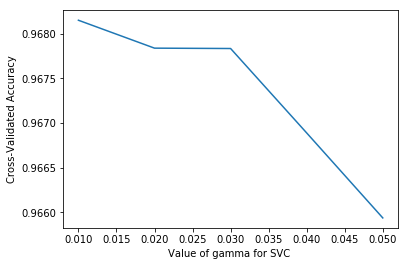

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
gamma_range=[0.01,0.02,0.03,0.04,0.05]
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**We can see there is constant decrease in the accuracy score as gamma value increase.Thus gamma=0.01 is the best parameter.**

In [31]:
#Taking polynomial kernel with different degree
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print('accuracy score using poly kernel and degree::',acc_score)

accuracy score using poly kernel and degree:: [0.85069262001432988, 0.94576466841811957, 0.83121168696759806, 0.86598200780192658, 0.77475718493750489]


Text(0,0.5,'Cross-Validated Accuracy')

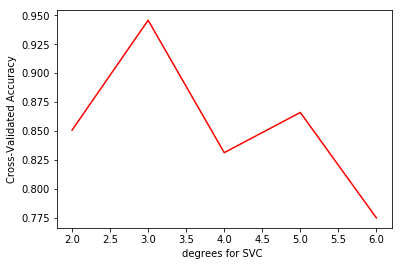

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
degree=[2,3,4,5,6]
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**Score is high for third degree polynomial and then there is drop in the accuracy score as degree of polynomial increases.Thus increase in polynomial degree results in high complexity of the model and thus causes overfitting**

**Now performing SVM by taking hyperparameter C=0.1 and kernel as linear**

In [33]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('accuracy_score using linear kernel and 0.1 C::',accuracy_score)

accuracy_score using linear kernel and 0.1 C:: 0.97476340694


In [34]:
#With K-fold cross validation(where K=10)
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print('cross validation score using linear kernel,0.1 C and k fold::',scores)

cross validation score using linear kernel,0.1 C and k fold:: [ 0.90880503  0.97169811  0.97484277  0.96855346  0.96202532  0.99050633
  0.99050633  0.98101266  0.95886076  0.99367089]


In [35]:
print(scores.mean())

0.970048164955


**The accuracy is slightly good without K-fold cross validation but it may fail to generalise the unseen data.Hence it is advisable to perform K-fold cross validation where all the data is covered so it may predict unseen data well.**

In [36]:
#Now performing SVM by taking hyperparameter gamma=0.01 and kernel as rbf
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.96687697160883279

In [37]:
#With K-fold cross validation(where K=10)
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.91194969  0.97169811  0.97169811  0.97169811  0.96202532  0.98734177
  0.99050633  0.98101266  0.95253165  0.99367089]
0.969413263275


In [38]:
#Now performing SVM by taking hyperparameter degree=3 and kernel as poly
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.958990536278


In [39]:
#With K-fold cross validation(where K=10)
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.89937107  0.94654088  0.93081761  0.91509434  0.95886076  1.
  0.98101266  0.96835443  0.87974684  0.9778481 ]
0.945764668418


In [40]:
#Let us perform Grid search technique to find the best parameter
from sklearn.svm import SVC
svm_model= SVC()

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

from sklearn.model_selection import GridSearchCV
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [41]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.956985003946


In [42]:
print(model_svm.best_params_)

{'C': 0.90000000000000002, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [43]:
#predicting the model
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.958990536278
